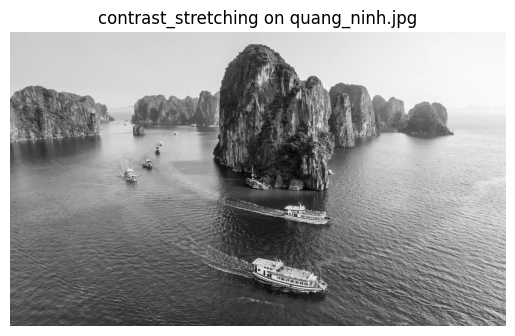

In [2]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def image_inverse(img):
    return 255 - img

def gamma_correction(img):
    gamma = 0.5
    b = img.astype(float)
    b /= np.max(b)
    result = np.power(b, gamma) * 255
    return result.astype(np.uint8)

def log_transform(img):
    b = img.astype(float)
    c = 255 / np.log(1 + np.max(b))
    result = c * np.log(1 + b)
    return result.astype(np.uint8)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    result = (img - min_val) / (max_val - min_val) * 255
    return result.astype(np.uint8)

# Danh sách hàm biến đổi
transformations = [
    image_inverse,
    gamma_correction,
    log_transform,
    histogram_equalization,
    contrast_stretching
]

# Lấy danh sách ảnh hợp lệ
input_folder = 'exercise'
output_folder = 'exercise/output'
os.makedirs(output_folder, exist_ok=True)

image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    # Chọn 1 ảnh và 1 thuật toán ngẫu nhiên
    selected_file = random.choice(image_files)
    random_transform = random.choice(transformations)
    random_rgb_order = [0, 1, 2]
    random.shuffle(random_rgb_order)

    img_path = os.path.join(input_folder, selected_file)
    img_rgb = Image.open(img_path).convert('RGB')

    # Đổi thứ tự RGB
    channels = list(img_rgb.split())
    shuffled_channels = [channels[i] for i in random_rgb_order]
    shuffled_img = Image.merge('RGB', tuple(shuffled_channels))

    # Chuyển sang grayscale để áp dụng biến đổi
    img_gray = np.array(shuffled_img.convert('L'))

    # Áp dụng phép biến đổi đã chọn
    transformed = random_transform(img_gray)

    # Hiển thị và lưu ảnh kết quả
    result_img = Image.fromarray(transformed)
    save_path = os.path.join(output_folder, f"modified_{selected_file}")
    result_img.save(save_path)

    plt.imshow(result_img, cmap='gray')
    plt.title(f"{random_transform.__name__} on {selected_file}")
    plt.axis('off')
    plt.show()
else:
    print("No image files found in the 'exercise' folder.")